In [204]:
from datetime import datetime
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [205]:
start = "01/04/19"
end ="02/03/23"

symbols = ["3407.JP","7453.JP","5021.JP","6504.JP","8035.JP","8830.JP","3626.JP","4062.JP","3861.JP","4206.JP"]

master_df = data.DataReader(symbols,"stooq",start,end)['Close'].sort_index()

In [206]:
master_df

Symbols,3407.JP,7453.JP,5021.JP,6504.JP,8035.JP,8830.JP,3626.JP,4062.JP,3861.JP,4206.JP
Date,,,,,,,,,,
2019-01-04,995.011,2414.78,1935.83,3058.31,10748.0,3769.51,1344.82,1396.80,510.623,3048.78
2019-01-07,1048.090,2460.19,1952.88,3165.27,11430.8,3890.10,1412.79,1452.24,528.782,3212.52
2019-01-08,1044.910,2473.18,2072.28,3170.14,11611.7,3870.01,1433.32,1463.70,522.437,3247.91
2019-01-09,1043.550,2488.01,2101.26,3179.86,11801.6,3851.84,1482.30,1448.39,541.513,3261.18
2019-01-10,1028.570,2229.47,2077.39,3087.48,12109.1,3848.00,1434.90,1443.62,544.242,3181.53
...,...,...,...,...,...,...,...,...,...,...
2023-01-27,971.000,1429.00,3695.00,5190.00,45480.0,3172.00,3715.00,5050.00,535.000,3105.00
2023-01-30,972.300,1433.00,3680.00,5250.00,45790.0,3156.00,3735.00,5160.00,532.000,3105.00
2023-01-31,982.400,1434.00,3620.00,5220.00,45170.0,3156.00,3730.00,5010.00,536.000,3130.00


In [207]:
df_day= master_df.pct_change()

returns_annual = df_day.mean()*245

cov_annual=df_day.cov()*245

In [208]:
num=100000
np.random.seed(0)

port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

In [209]:
# 様々な銘柄の比率でのポートフォリオのリターンとリスクを計算
for i in range(num): # single_portfolio

	# 銘柄の比率を乱数で決定
	weights = np.random.uniform(1,10000,len(symbols))
	weights=weights**4
	weights /= np.sum(weights)

	# ポートフォリオの期待リターンを計算
	returns = np.dot(weights, returns_annual)

	# ポートフォリオのボラティリティを計算
	volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

	# シャープレシオを計算
	sharpe = returns / volatility
	sharpe_ratio.append(sharpe)

	# 計算値をリストに格納
	port_returns.append(returns)
	port_volatility.append(volatility)
	stock_weights.append(weights)

# 辞書型に格納
portfolio = {"Returns": port_returns,
			"Volatility": port_volatility,
			"Sharpe Ratio" : sharpe_ratio}

# 計算したポートフォリオのリターンとリスクに、比率のデータを加える
for counter,symbol in enumerate(symbols):
    portfolio[str(symbol) + " Weight"] = [Weight[counter] for Weight in stock_weights]



In [210]:
df = pd.DataFrame(portfolio)
# データフレーム完成

df.tail(10)

,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
99990,0.163942,0.234114,0.700269,1.324278e-01,0.001047,0.003333,1.383368e-03,0.072123,1.325158e-01,0.003942,0.250702,4.025137e-01,0.000012
99991,0.173007,0.239418,0.722615,1.162161e-02,0.182800,0.231866,2.475824e-01,0.035495,6.196866e-02,0.221273,0.004214,3.160879e-03,0.000018
99992,0.046666,0.227947,0.204723,2.384987e-01,0.264879,0.057650,5.202410e-09,0.051418,7.672758e-03,0.000444,0.004664,6.252740e-02,0.312246
99993,0.330089,0.307201,1.074504,3.108680e-02,0.006371,0.071233,1.395981e-01,0.008648,1.572488e-02,0.151954,0.574804,1.254545e-08,0.000579
99994,0.255733,0.269751,0.948034,1.043449e-02,0.190506,0.000190,6.343764e-06,0.505342,1.486328e-03,0.014643,0.085684,4.715576e-09,0.191708
99995,0.090270,0.259264,0.348178,1.731214e-08,0.000806,0.000004,1.080245e-01,0.058024,2.721303e-03,0.000188,0.000002,8.098993e-01,0.020331
99996,0.070853,0.246397,0.287555,3.360611e-01,0.001412,0.130425,6.596451e-06,0.000235,2.954913e-07,0.000120,0.000252,5.184495e-01,0.013039
99997,0.075480,0.244819,0.308310,5.763236e-01,0.000347,0.033641,3.839300e-05,0.031848,2.245861e-02,0.037016,0.014932,2.479719e-01,0.035423
99998,0.163214,0.234166,0.697001,2.062962e-01,0.007291,0.004512,1.152184e-03,0.329985,1.709111e-01,0.000010,0.000050,3.285896e-04,0.279465
99999,0.154593,0.240242,0.643488,2.003686e-02,0.032003,0.000106,2.702534e-01,0.182622,2.570505e-05,0.000904,0.011097,4.567727e-02,0.437274


In [211]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# ポートフォリオをテキスト出力(ソートして出力)
print("\n---sharpe_portfolio-----\n") # 最大SR
sharpe_sort=sharpe_portfolio.iloc[:,3:].T
sharpe_sort.sort_values(by=sharpe_sort.columns[0] ,ascending=False ,axis=0,inplace=True)
print(sharpe_portfolio.iloc[:,0:2].T)
print(sharpe_sort)

print("\n---min_variance_port-----\n") # 最少分散ポートフォリオ
min_sort=min_variance_port.iloc[:,3:].T
min_sort.sort_values(by=min_sort.columns[0] ,ascending=False ,axis=0,inplace=True)
print(min_variance_port.iloc[:,0:2].T)
print(min_sort)


---sharpe_portfolio-----

               63570
Returns     0.354823
Volatility  0.263057
                       63570
3626.JP Weight  4.190681e-01
8035.JP Weight  3.806694e-01
4062.JP Weight  1.168135e-01
5021.JP Weight  7.552407e-02
8830.JP Weight  3.796890e-03
4206.JP Weight  2.087876e-03
7453.JP Weight  1.549454e-03
3407.JP Weight  4.904276e-04
6504.JP Weight  2.082594e-07
3861.JP Weight  4.554324e-08

---min_variance_port-----

               86107
Returns     0.118876
Volatility  0.201254
                       86107
3861.JP Weight  3.565430e-01
3626.JP Weight  2.405048e-01
4206.JP Weight  1.821367e-01
7453.JP Weight  1.000367e-01
8035.JP Weight  4.983574e-02
8830.JP Weight  3.922290e-02
5021.JP Weight  1.828417e-02
3407.JP Weight  8.833644e-03
6504.JP Weight  4.602185e-03
4062.JP Weight  2.262172e-07


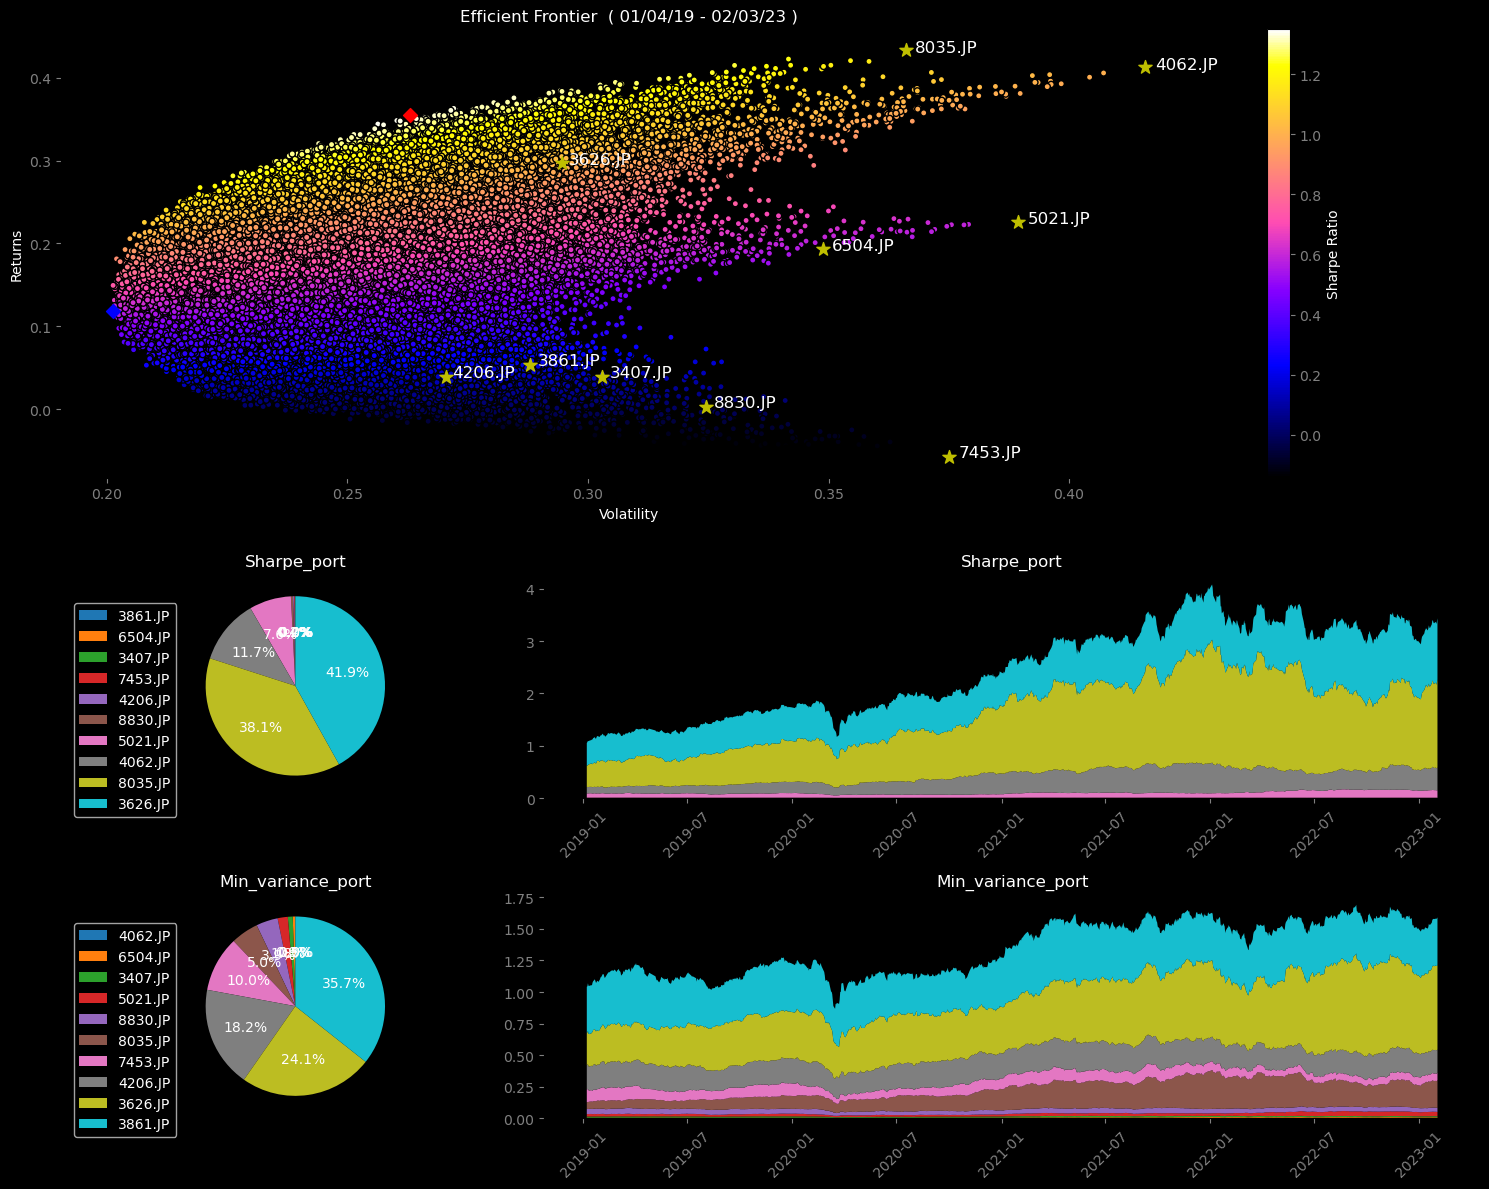

In [212]:
# グラフパラメータ設定
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["axes.labelcolor"] = 'white'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'white'

# グラフ領域設定
fig = plt.figure(facecolor='white',figsize=(15,12),tight_layout="True")
spec = gridspec.GridSpec(ncols=2, nrows=3,height_ratios=[1,0.5,0.5],width_ratios=[0.5,1])

#　グラフに領域を割り当て
ax1 =  fig.add_subplot(spec[0,:], title='Efficient Frontier  ( '+str(start) +" - "+str(end)+ " )")
ax2 =  fig.add_subplot(spec[1,0], title='Sharpe_port' )
ax3 =  fig.add_subplot(spec[2,0], title='Min_variance_port')
ax4 =  fig.add_subplot(spec[1,1], title='Sharpe_port')
ax5 =  fig.add_subplot(spec[2,1], title='Min_variance_port')
fig.patch.set_facecolor('black')

# フロンティア、シャープ最大値、ボラティリティ最小値の散布図
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',cmap='gnuplot2', edgecolors='black',alpha=1, ax=ax1)
ax1.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=50)
ax1.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=50 )

for counter,stock in enumerate(symbols):

   volatility = np.sqrt(cov_annual.loc[stock,stock])
   ax1.scatter(x=volatility, y=returns_annual[stock], c='y', marker='*', s=100)
   ax1.annotate(stock, (volatility*1.005, returns_annual[stock]*0.995),size=12,color="white")

# パイチャート1
df_pie1=sharpe_portfolio.T.iloc[3:,:]
df_pie1=df_pie1.sort_values(by=df_pie1.columns[0], axis=0, ascending=True, inplace=False)
col1=[s.replace(' Weight', '') for s in df_pie1.index.tolist()]
ax2.pie(df_pie1.iloc[:,0].tolist(), autopct="%1.1f%%",startangle=90)
ax2.legend(col1,fontsize=10,  bbox_to_anchor=(0, 0.9))


# パイチャート２
df_pie2=min_variance_port.T.iloc[3:,:]
df_pie2=df_pie2.sort_values(by=df_pie2.columns[0], axis=0, ascending=True, inplace=False)
col2=[s.replace(' Weight', '') for s in df_pie2.index.tolist()]
ax3.pie(df_pie2.iloc[:,0].tolist(), autopct="%1.1f%%",startangle=90)
ax3.legend(col2,fontsize=10,  bbox_to_anchor=(0, 0.9))


# 積み上げグラフの元データ
df_all=(1+master_df.pct_change()).cumprod()

# 積み上げグラフ１
df_sharpe=df_all.loc[:,col1]
for i in range(len(col1)):
 df_sharpe.iloc[:,i]=df_sharpe.iloc[:,i] * df_pie1.iloc[:,0].values[i]
ax4.stackplot(df_sharpe.index, df_sharpe.values.T)
ax4.tick_params(axis='x', labelrotation=45)

# 積み上げグラフ２
df_min=df_all.loc[:,col2]
for i in range(len(col2)):
 df_min.iloc[:,i]=df_min.iloc[:,i] * df_pie2.iloc[:,0].values[i]
ax5.stackplot(df_min.index, df_min.values.T)
ax5.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

In [213]:
df_sharpe = df.sort_values("Sharpe Ratio", ascending=True)
print("\n---sharpe_portfolio-----\n")
df_sharpe.tail(1)


---sharpe_portfolio-----



,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
63570,0.354823,0.263057,1.348846,0.00049,0.001549,0.075524,2.082594e-07,0.380669,0.003797,0.419068,0.116814,4.554324e-08,0.002088


In [214]:
df_min = df.sort_values("Volatility", ascending=True)
print("\n---min_variance_port-----\n")
df_min.head(1)


---min_variance_port-----



,Returns,Volatility,Sharpe Ratio,3407.JP Weight,7453.JP Weight,5021.JP Weight,6504.JP Weight,8035.JP Weight,8830.JP Weight,3626.JP Weight,4062.JP Weight,3861.JP Weight,4206.JP Weight
86107,0.118876,0.201254,0.590676,0.008834,0.100037,0.018284,0.004602,0.049836,0.039223,0.240505,2.262172e-07,0.356543,0.182137


In [215]:
ddff=df_sharpe.tail(1).drop(["Returns","Volatility","Sharpe Ratio"],axis=1)
x=[]
for i in range(0,len(ddff.columns)):
    x.append(round(ddff.iat[0,i],8))

# ポートフォリオ株価を求める際に、このリストをコピペで貼る
print(x)

[0.00049043, 0.00154945, 0.07552407, 2.1e-07, 0.38066939, 0.00379689, 0.41906812, 0.11681351, 5e-08, 0.00208788]
